# Data Science Assignment #3

## Background
This assignment investigates bank stock prices. The dataset online Bank-StocksMerged.txt
provides stock prices for a sample of banks. Some of the banks in the
sample go back to 1900 and others are more recent (up to 2017). The data include
the date the stock price was recorded, the bank’s stock ticker, OHLC (open, high, low,
close) prices, and volume. Note that the historical data points (typically before 1975)
record monthly, whereas after the data points are daily.

# 1) Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates

%matplotlib inline

# 2) Import the Data

In [2]:
# Import data, set seperators as Tab, indicate header is on the first row
df = pd.read_csv('bank-stocks-merged.txt', sep = "\t", header = 0)

# Rename column
df = df.rename(columns={'?Date': 'Date'})
df.head()

Date Ticker      Open      High       Low     Close       Volume
0  5/19/1994   ABCB  5.064261  5.368117  5.064261  5.266831  1347.679366
1  5/20/1994   ABCB  5.165546  5.368117  5.064261  5.266831   545.489267
2  5/23/1994   ABCB  5.266831  5.266831  5.064261  5.064261   167.842851
3  5/24/1994   ABCB  5.266831  5.266831  5.064261  5.064261    78.984871
4  5/25/1994   ABCB  5.165546  5.165546  5.064261  5.064261   135.755247

In [3]:
df.describe()

Open           High            Low          Close  \
count  653006.000000  653006.000000  653006.000000  653006.000000   
mean       55.259570      58.959899      54.972648      55.267934   
std       321.545042     511.748469     321.206919     321.531949   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.200000       7.333333       7.063953       7.200000   
50%        14.625000      14.876033      14.500000      14.630431   
75%        25.190000      25.340000      25.060000      25.200000   
max      7500.000000   50000.000000    7500.000000    7500.000000   

             Volume  
count  6.530060e+05  
mean   3.036887e+03  
std    8.382849e+04  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.000000e+01  
75%    1.448163e+02  
max    1.226600e+07

# 3) Computing Average Daily Returns

Suppose this sample of firms is an index. Filter the sample to observations that
record daily data from 2000-present. Calculate average daily returns for banks
during that period. (Hint: first compute daily returns using the closing price
for each bank, then take the average for that day).

In [4]:
#Clean data. First get rid of extraneous chars, then convert to datetime
df['Date'] = list(map(lambda x: x.strip().replace("?", ""), df.Date))
df['Date'] = list(map(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"), df.Date))
df.head()

Date Ticker      Open      High       Low     Close       Volume
0 1994-05-19   ABCB  5.064261  5.368117  5.064261  5.266831  1347.679366
1 1994-05-20   ABCB  5.165546  5.368117  5.064261  5.266831   545.489267
2 1994-05-23   ABCB  5.266831  5.266831  5.064261  5.064261   167.842851
3 1994-05-24   ABCB  5.266831  5.266831  5.064261  5.064261    78.984871
4 1994-05-25   ABCB  5.165546  5.165546  5.064261  5.064261   135.755247

In [5]:
df.describe()

Open           High            Low          Close  \
count  653006.000000  653006.000000  653006.000000  653006.000000   
mean       55.259570      58.959899      54.972648      55.267934   
std       321.545042     511.748469     321.206919     321.531949   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.200000       7.333333       7.063953       7.200000   
50%        14.625000      14.876033      14.500000      14.630431   
75%        25.190000      25.340000      25.060000      25.200000   
max      7500.000000   50000.000000    7500.000000    7500.000000   

             Volume  
count  6.530060e+05  
mean   3.036887e+03  
std    8.382849e+04  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.000000e+01  
75%    1.448163e+02  
max    1.226600e+07

In [6]:
#Curate sample to datapoints after Jan 1, 2000
sample = df[ df.Date >= datetime.date(2000, 1, 1)]
sample.head()

Date Ticker      Open      High       Low     Close      Volume
1420 2000-01-03   ABCB  8.862454  8.913097  8.406671  8.710527  584.981849
1421 2000-01-04   ABCB  8.507956  8.609241  8.507956  8.609241   72.814196
1422 2000-01-05   ABCB  8.507956  8.609241  8.507956  8.609241   86.389725
1423 2000-01-06   ABCB  8.659884  8.913097  8.609241  8.609241   16.043806
1424 2000-01-07   ABCB  8.811812  8.913097  8.609241  8.710527  130.818726

In [7]:
sample.describe()

Open           High            Low          Close  \
count  347098.000000  347098.000000  347098.000000  347098.000000   
mean       79.860941      86.475139      79.625740      79.871826   
std       436.415691     698.738523     436.014071     436.396844   
min         0.010000       0.010000       0.010000       0.010000   
25%         9.220000       9.300000       9.130000       9.220000   
50%        17.400000      17.550000      17.240000      17.400000   
75%        25.470000      25.570000      25.370000      25.480000   
max      7500.000000   50000.000000    7500.000000    7500.000000   

             Volume  
count  3.470980e+05  
mean   3.932989e+03  
std    1.139590e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.700000e+01  
75%    1.530000e+02  
max    1.226600e+07

The following two outputs show daily return amount and daily return percentage.

In [8]:
# Calculate daily return
pd.options.mode.chained_assignment = None
sample["ReturnAmt"] = (sample["Close"] - sample["Open"])
sample["ReturnPct"] = (sample["Close"] - sample["Open"]) / sample ["Close"]
sample.head()

Date Ticker      Open      High       Low     Close      Volume  \
1420 2000-01-03   ABCB  8.862454  8.913097  8.406671  8.710527  584.981849   
1421 2000-01-04   ABCB  8.507956  8.609241  8.507956  8.609241   72.814196   
1422 2000-01-05   ABCB  8.507956  8.609241  8.507956  8.609241   86.389725   
1423 2000-01-06   ABCB  8.659884  8.913097  8.609241  8.609241   16.043806   
1424 2000-01-07   ABCB  8.811812  8.913097  8.609241  8.710527  130.818726   

      ReturnAmt  ReturnPct  
1420  -0.151928  -0.017442  
1421   0.101285   0.011765  
1422   0.101285   0.011765  
1423  -0.050643  -0.005882  
1424  -0.101285  -0.011628

In [9]:
# Compute average daily return for each bank across all datapoints from Jan 1, 2000 - Present.
# The solution computed is the overall average return during the time period.
sample.groupby(["Ticker"]).agg( {"ReturnAmt": np.mean, "ReturnPct": np.mean}).head()

ReturnAmt  ReturnPct
Ticker                      
ABCB     0.008400  -0.000112
ACBI     0.025412   0.001527
AF+C     0.001291   0.000002
AFCB     0.011886   0.000596
AFIC1    0.071444   0.002470

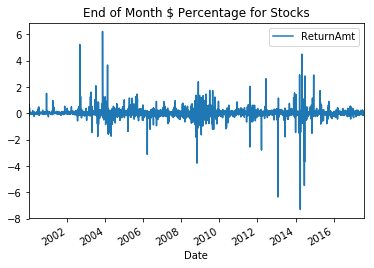

In [10]:
# Plot Return percentage for stocks on a given day over time
sample.groupby(["Date"]).agg( {"ReturnAmt": np.mean}).plot(title = "End of Month $ Percentage for Stocks")

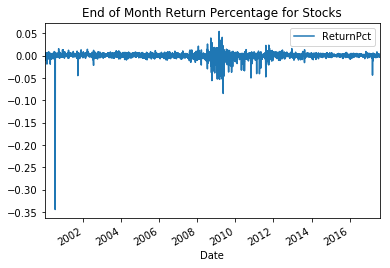

In [11]:
# Plot Return percentage for stocks on a given day over time
sample.groupby(["Date"]).agg( {"ReturnPct": np.mean}).plot(title = "End of Month Return Percentage for Stocks")

/Users/jason.barbarosh/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/jason.barbarosh/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=732614.0, right=732614.0
  'left=%s, right=%s') % (left, right))


Ticker
ABCB       Axes(0.125,0.2;0.775x0.68)
ACBI       Axes(0.125,0.2;0.775x0.68)
AF+C       Axes(0.125,0.2;0.775x0.68)
AFCB       Axes(0.125,0.2;0.775x0.68)
AFIC1      Axes(0.125,0.2;0.775x0.68)
AFSC1      Axes(0.125,0.2;0.775x0.68)
AICA1      Axes(0.125,0.2;0.775x0.68)
AIV+Z1     Axes(0.125,0.2;0.775x0.68)
AMPB1      Axes(0.125,0.2;0.775x0.68)
AMRB       Axes(0.125,0.2;0.775x0.68)
ANBC1      Axes(0.125,0.2;0.775x0.68)
ANDB1      Axes(0.125,0.2;0.775x0.68)
ANNB2      Axes(0.125,0.2;0.775x0.68)
AOZOY      Axes(0.125,0.2;0.775x0.68)
APAB1      Axes(0.125,0.2;0.775x0.68)
APBA1      Axes(0.125,0.2;0.775x0.68)
APLO       Axes(0.125,0.2;0.775x0.68)
AQFH       Axes(0.125,0.2;0.775x0.68)
ARBV       Axes(0.125,0.2;0.775x0.68)
AREA1      Axes(0.125,0.2;0.775x0.68)
AROW       Axes(0.125,0.2;0.775x0.68)
ASB        Axes(0.125,0.2;0.775x0.68)
ASB+B1     Axes(0.125,0.2;0.775x0.68)
ASB+C      Axes(0.125,0.2;0.775x0.68)
ASB+D      Axes(0.125,0.2;0.775x0.68)
ASB.W1     Axes(0.125,0.2;0.775x0.68)
ASBB 

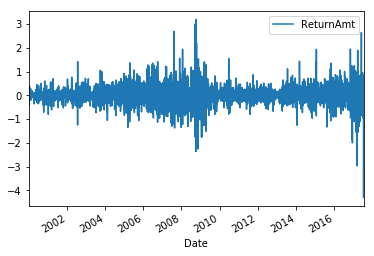

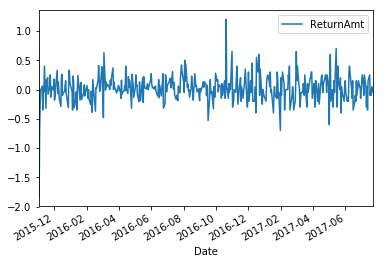

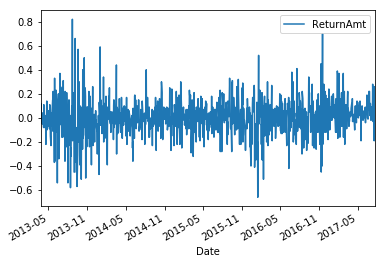

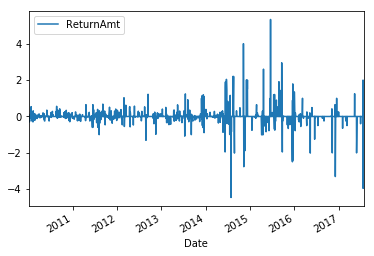

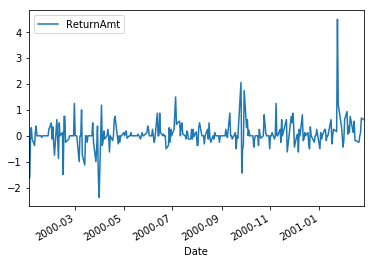

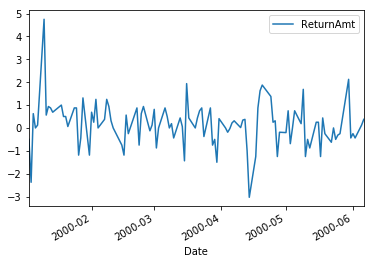

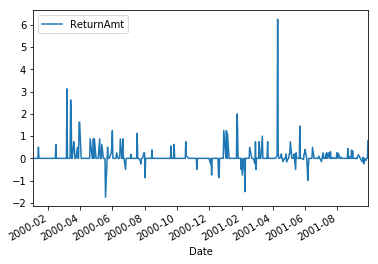

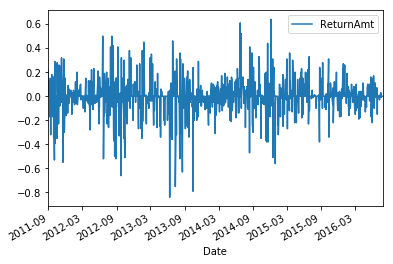

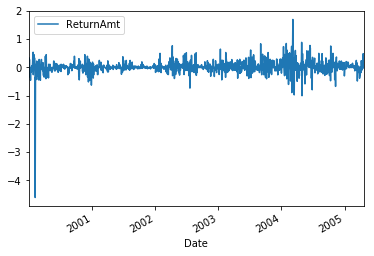

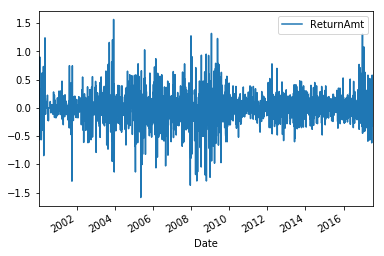

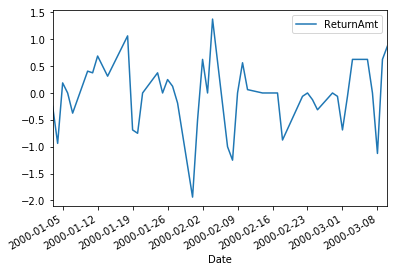

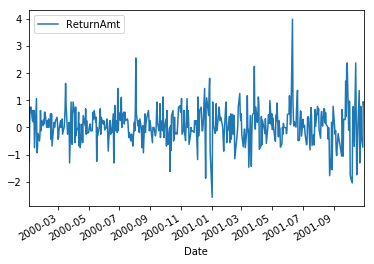

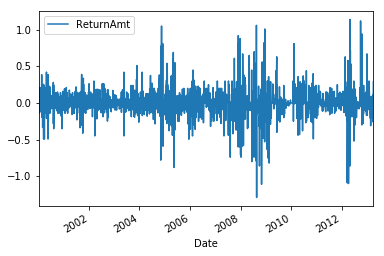

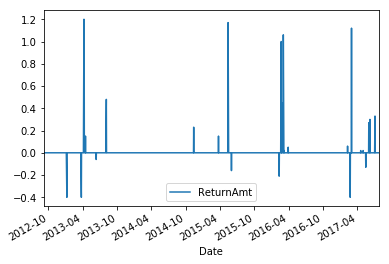

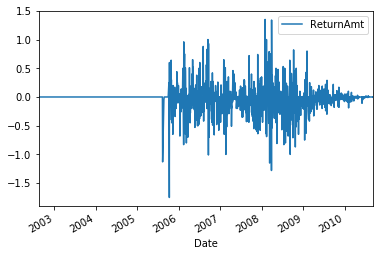

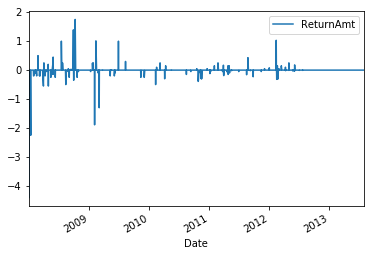

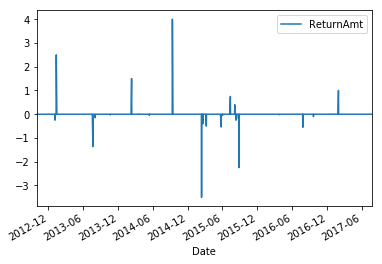

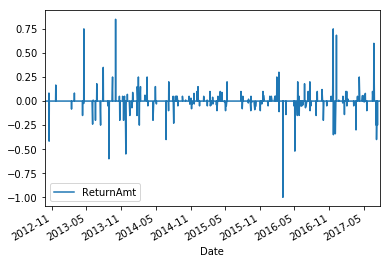

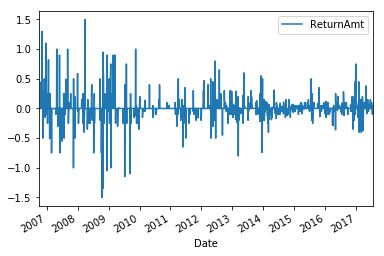

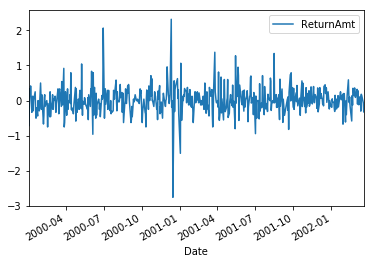

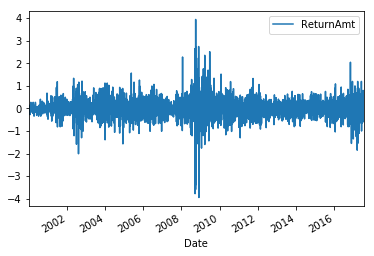

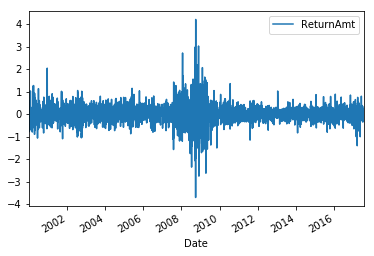

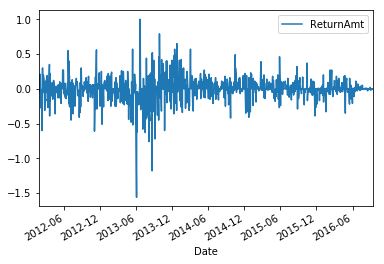

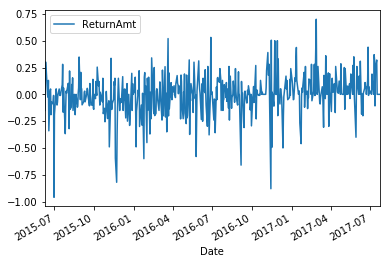

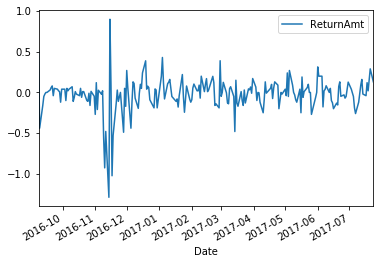

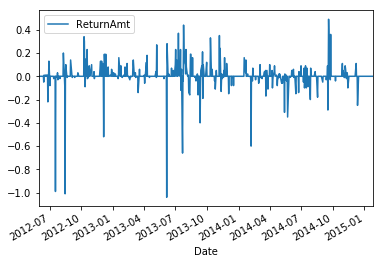

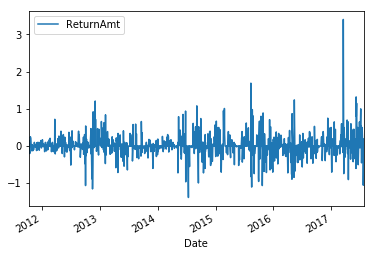

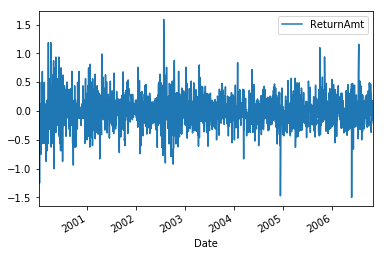

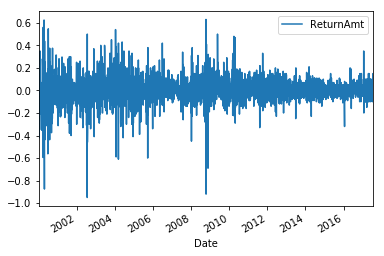

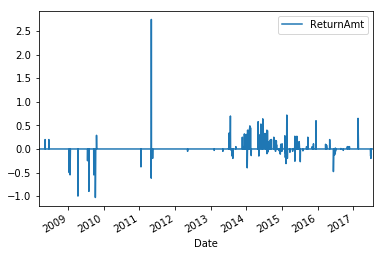

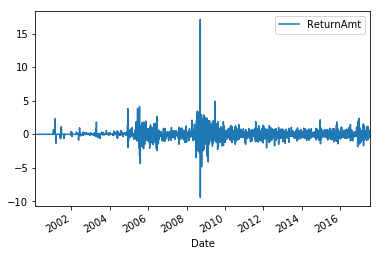

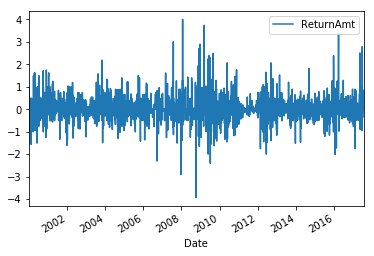

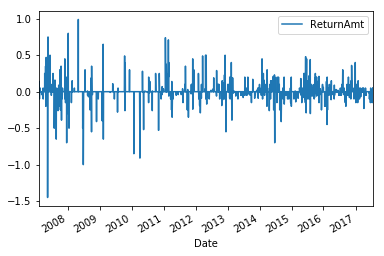

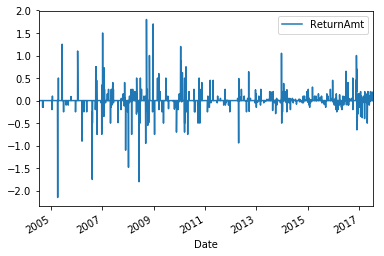

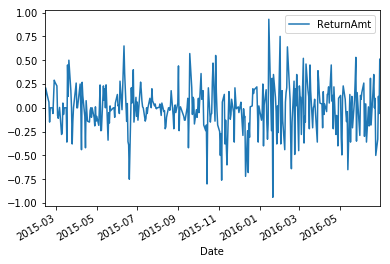

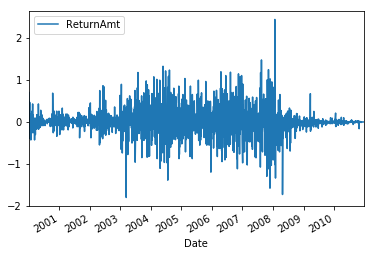

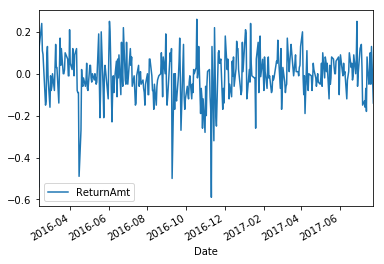

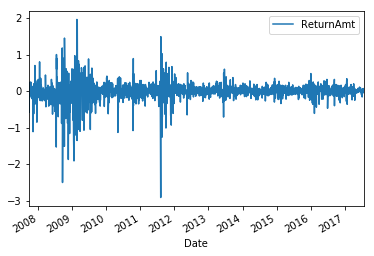

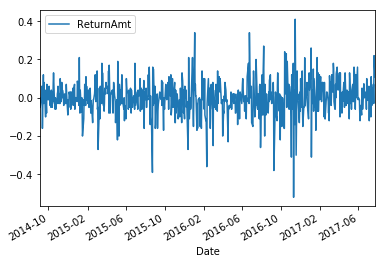

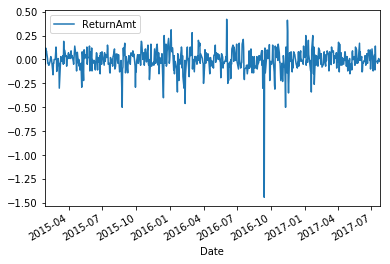

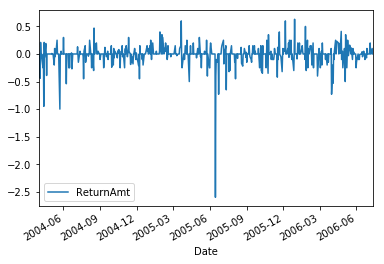

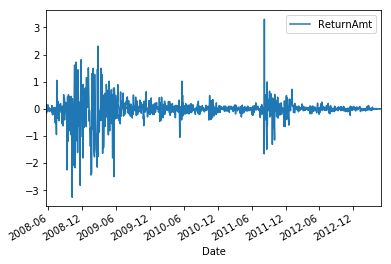

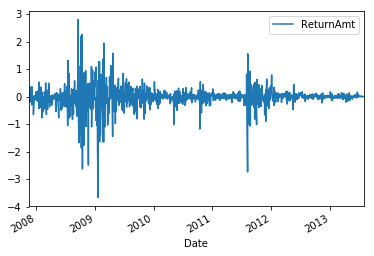

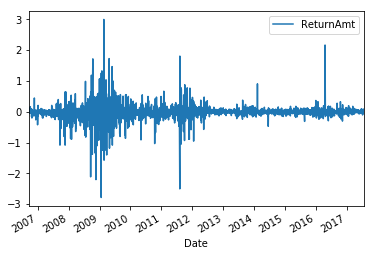

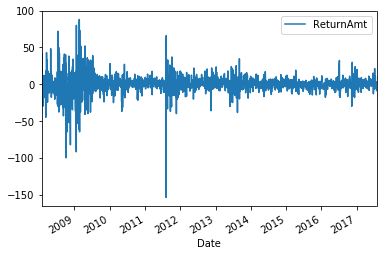

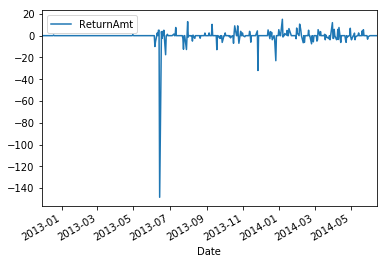

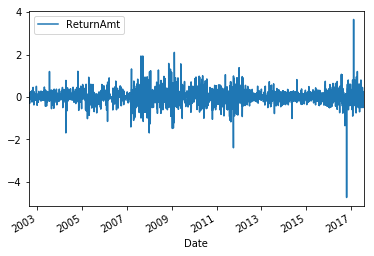

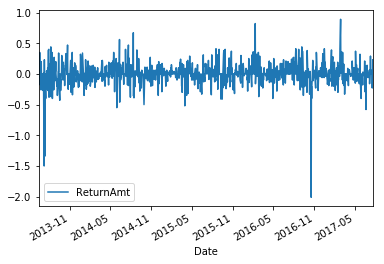

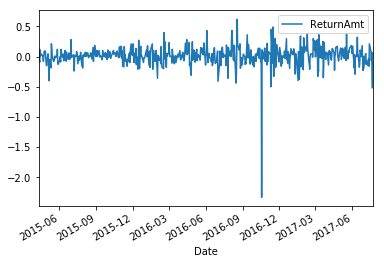

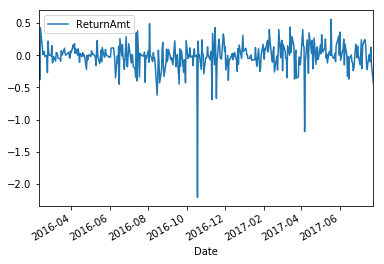

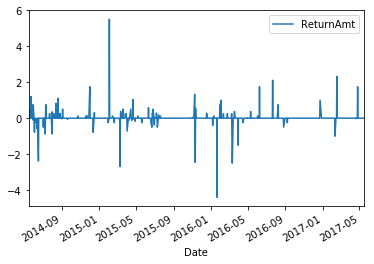

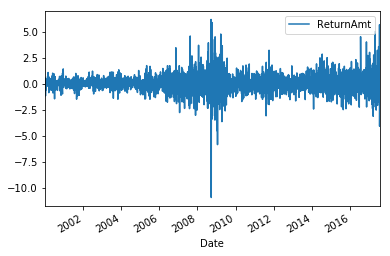

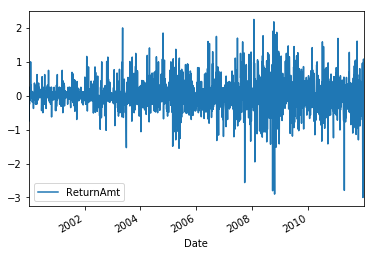

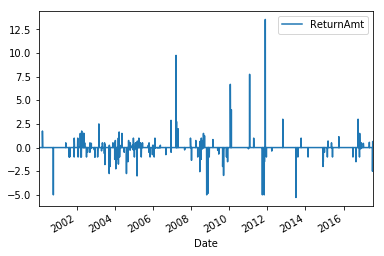

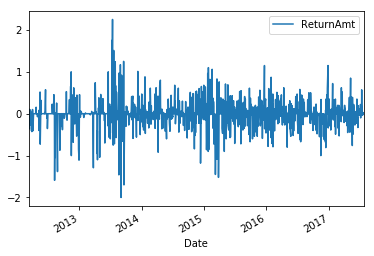

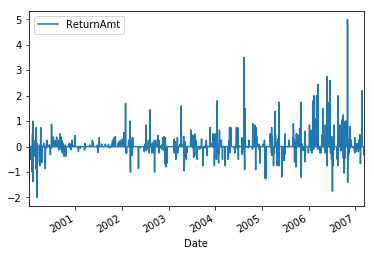

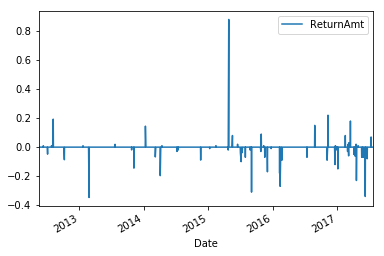

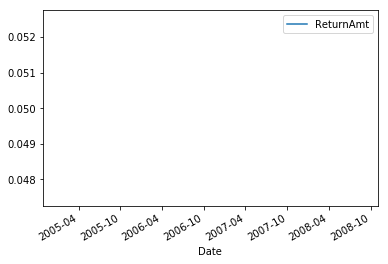

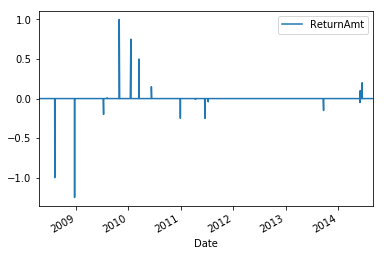

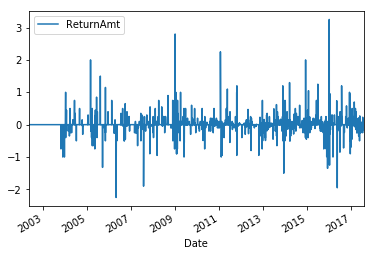

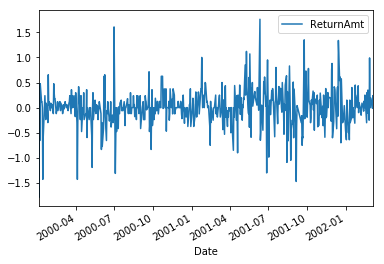

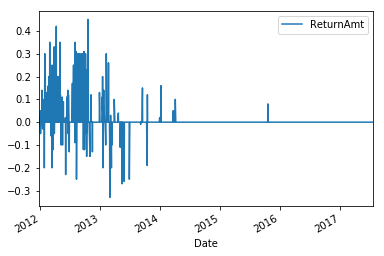

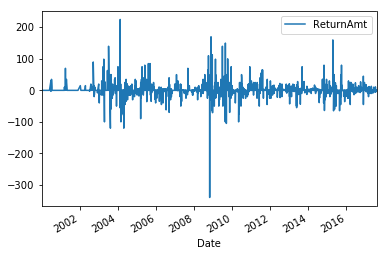

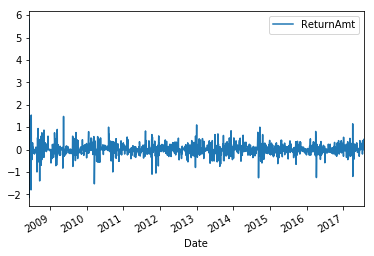

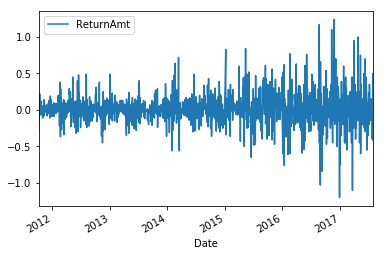

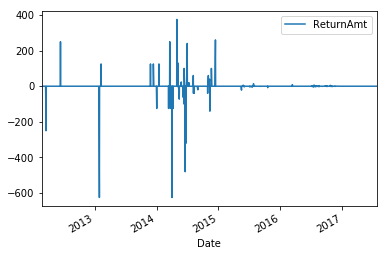

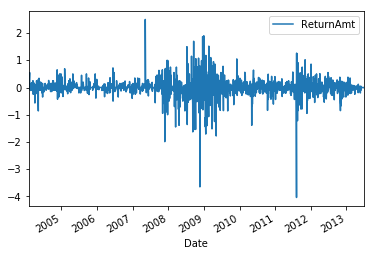

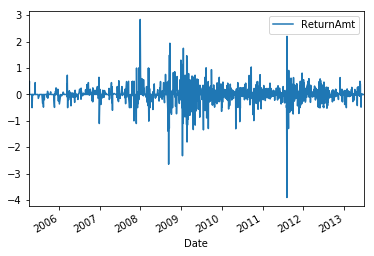

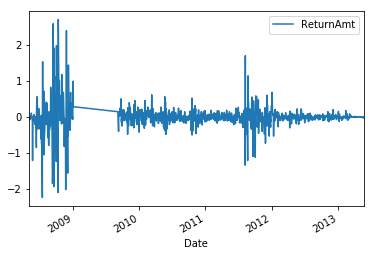

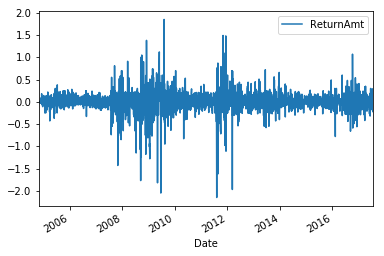

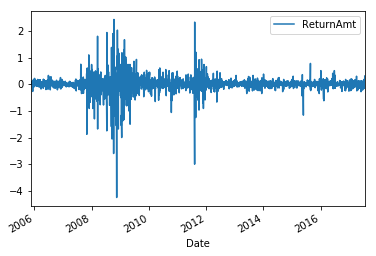

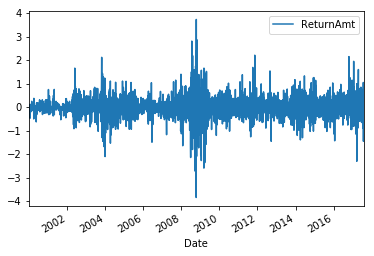

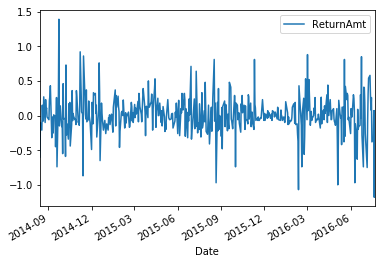

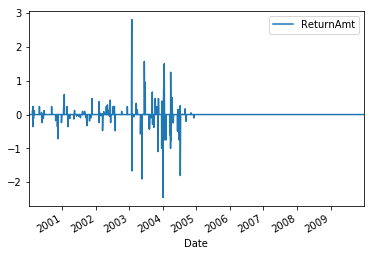

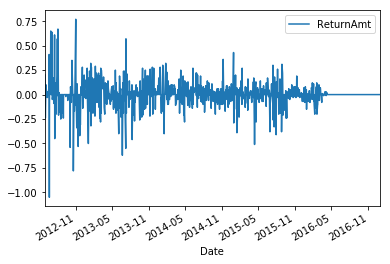

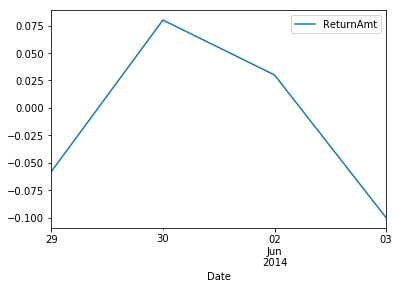

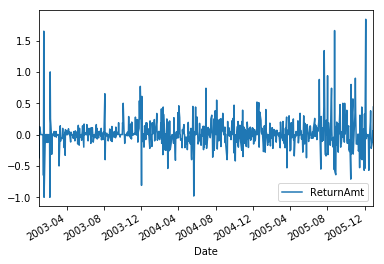

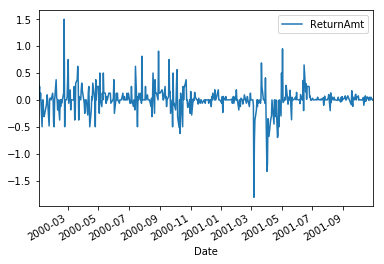

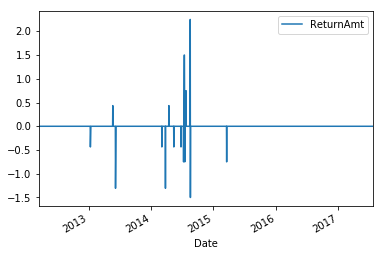

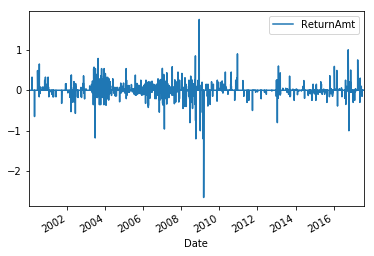

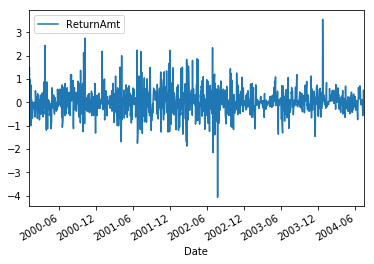

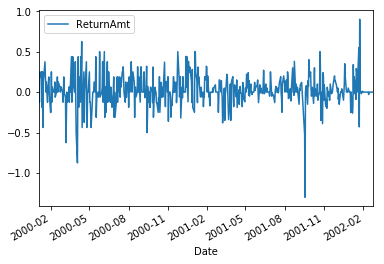

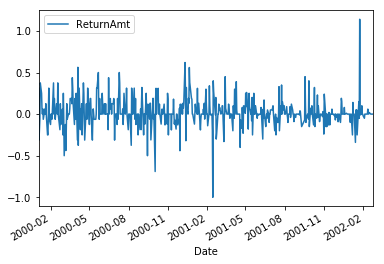

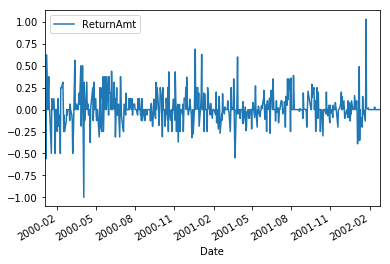

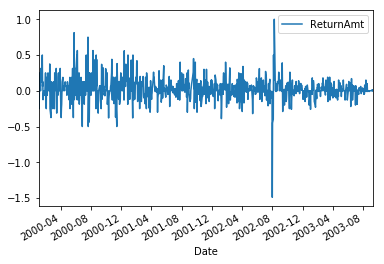

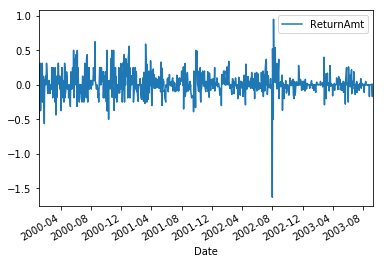

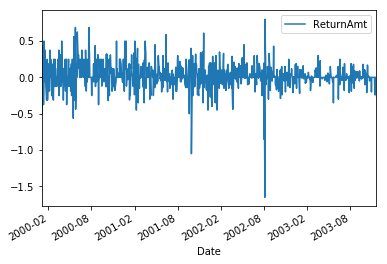

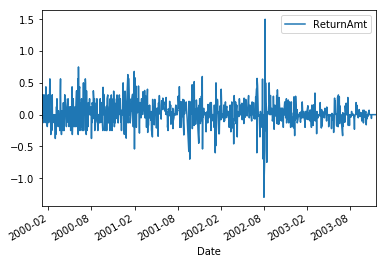

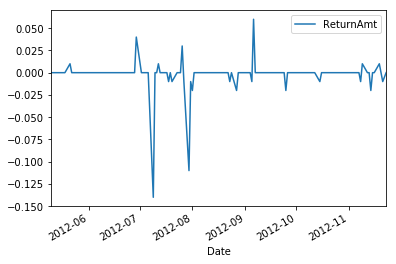

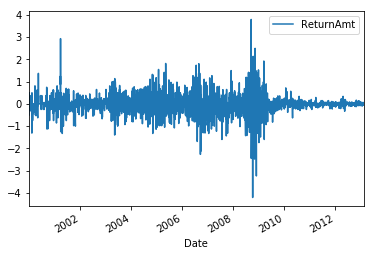

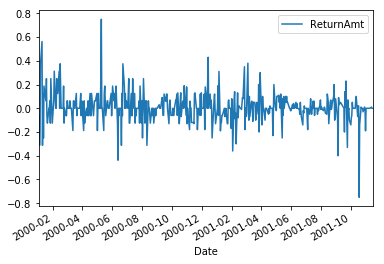

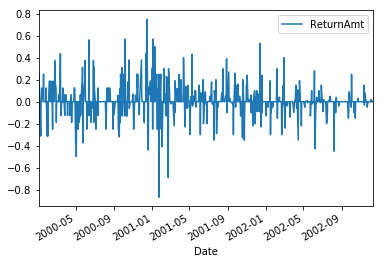

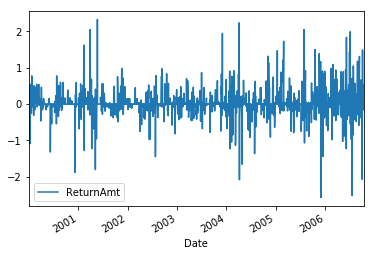

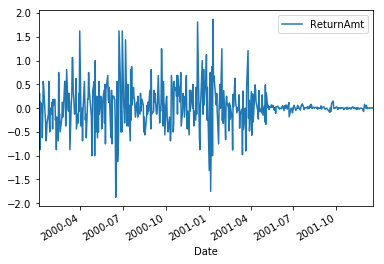

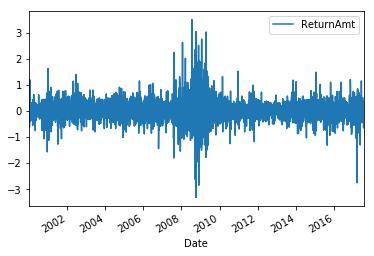

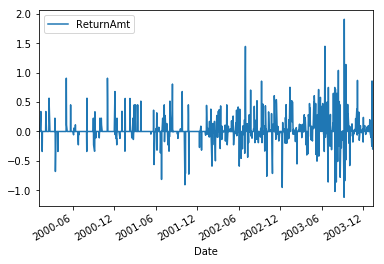

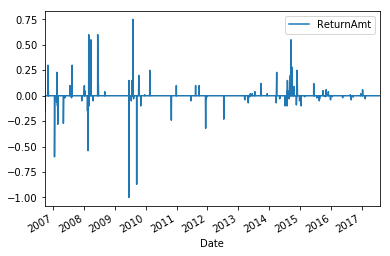

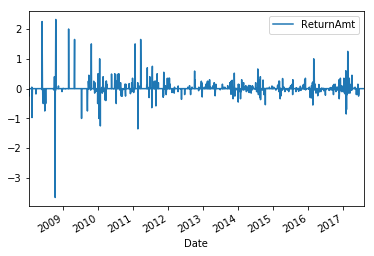

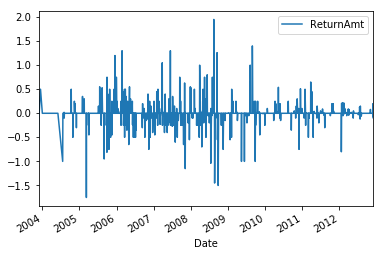

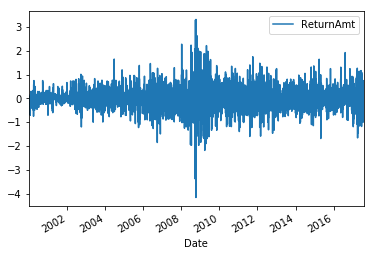

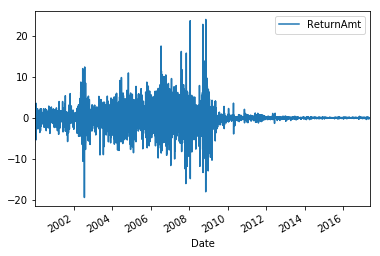

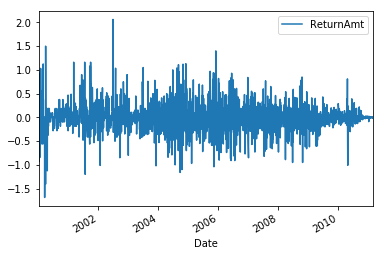

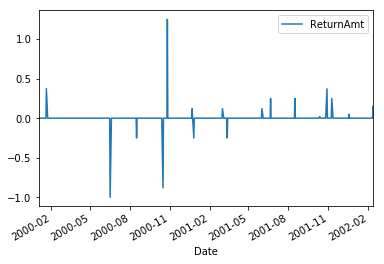

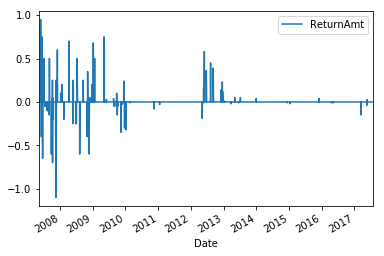

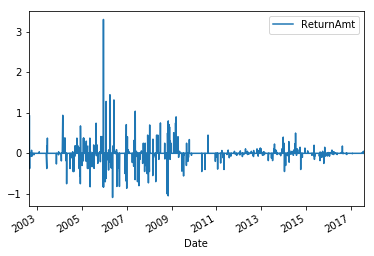

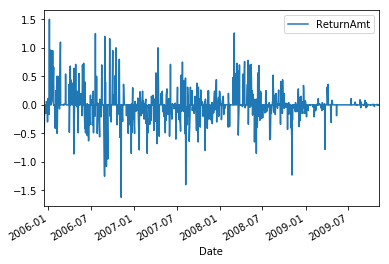

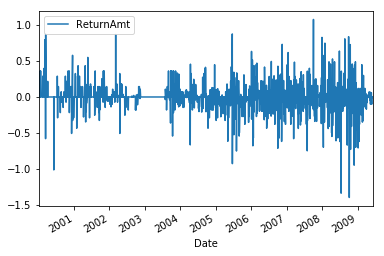

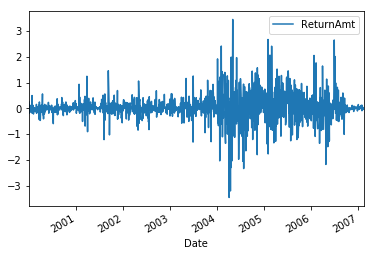

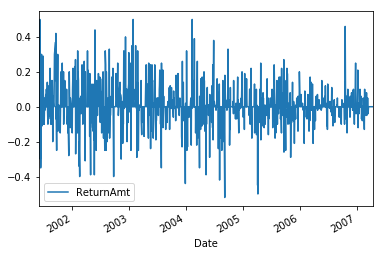

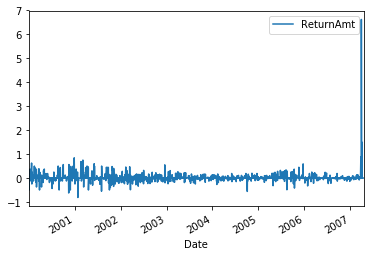

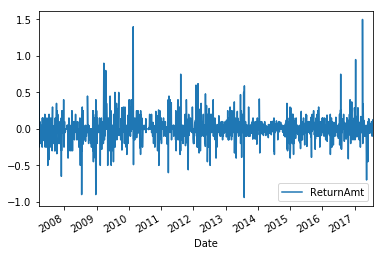

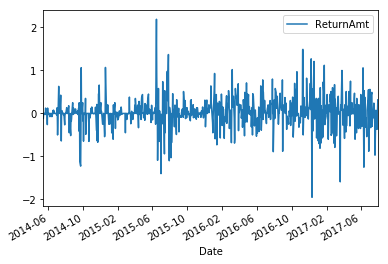

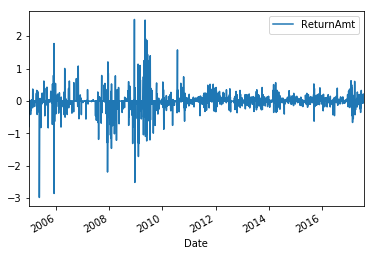

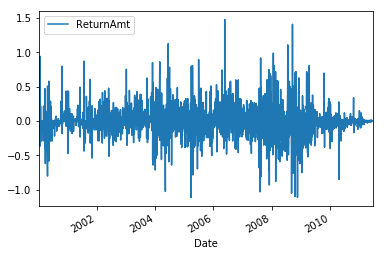

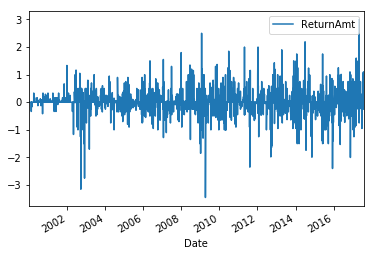

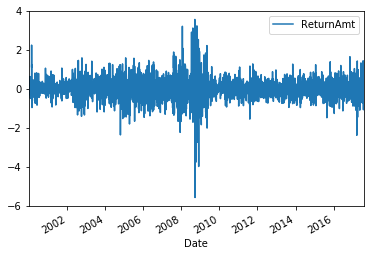

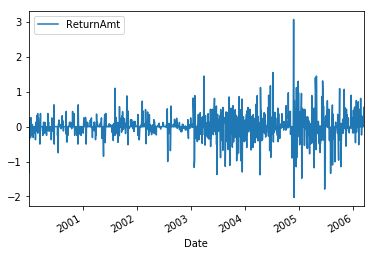

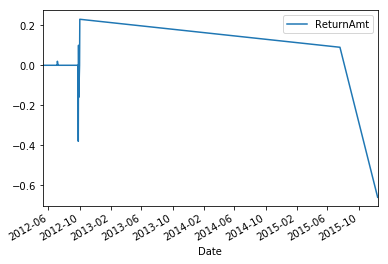

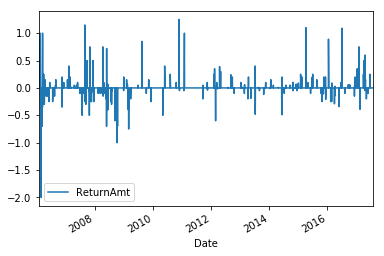

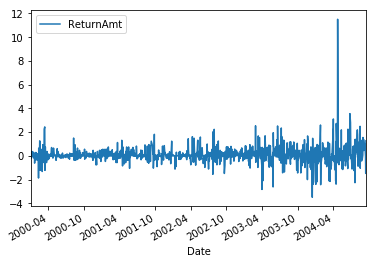

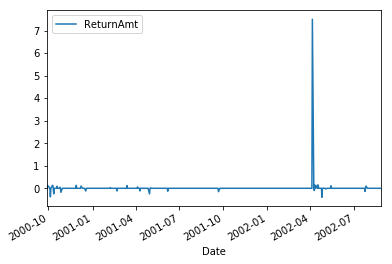

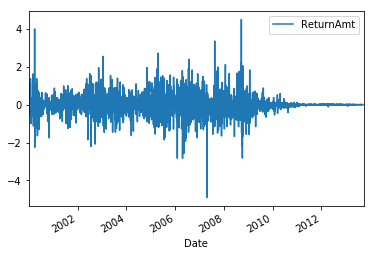

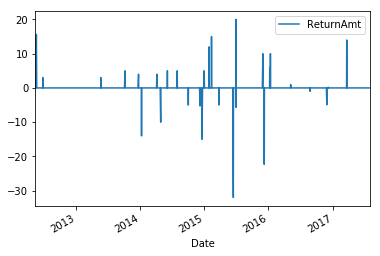

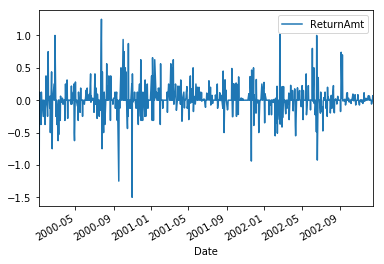

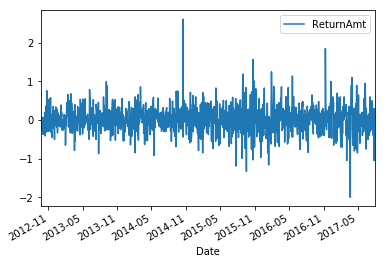

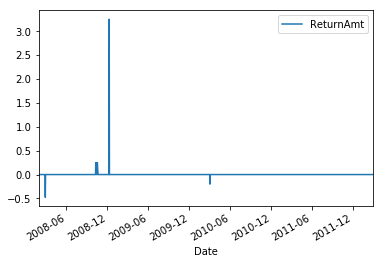

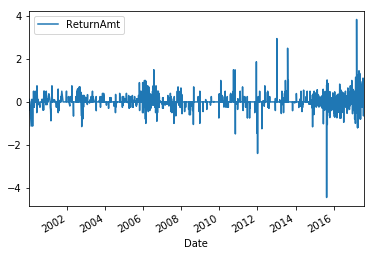

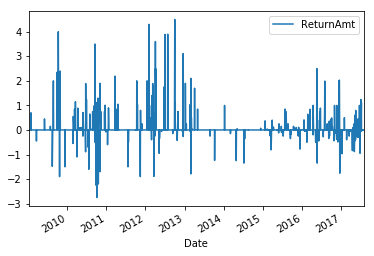

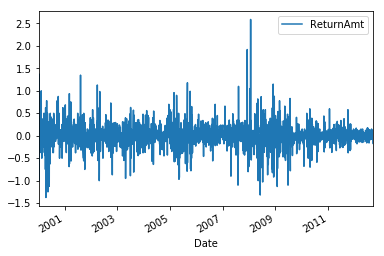

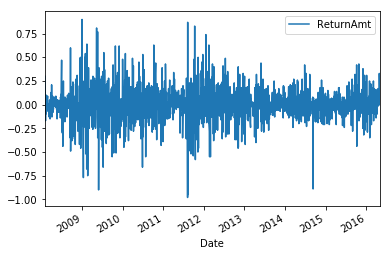

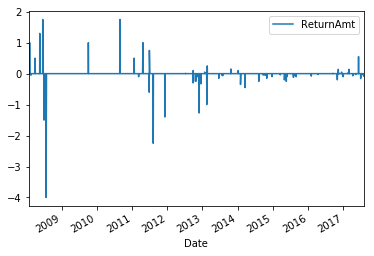

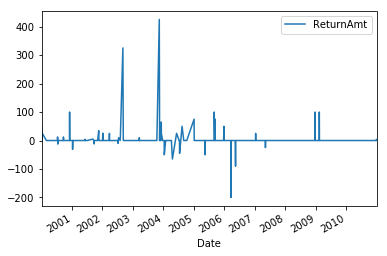

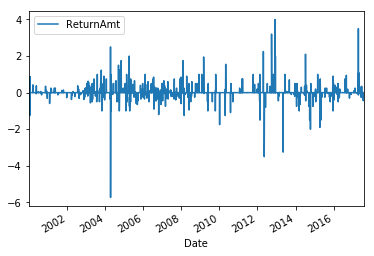

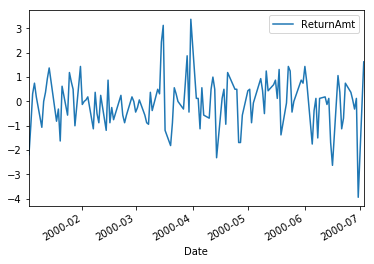

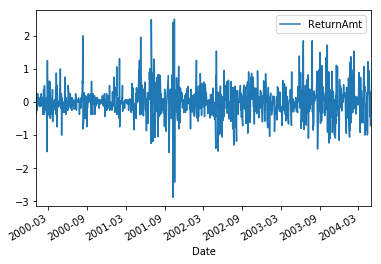

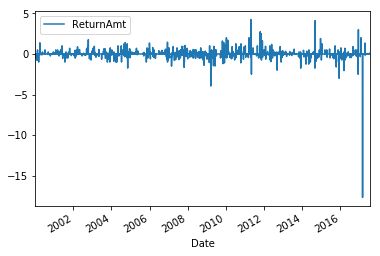

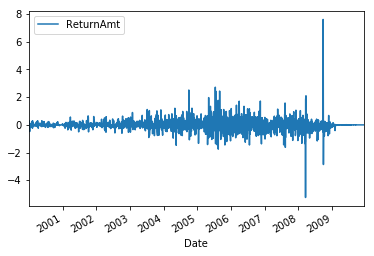

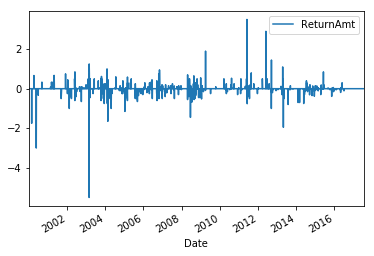

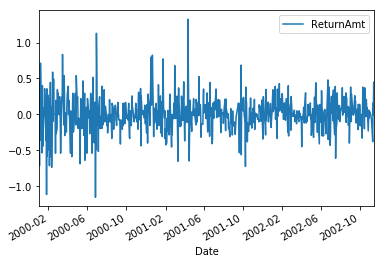

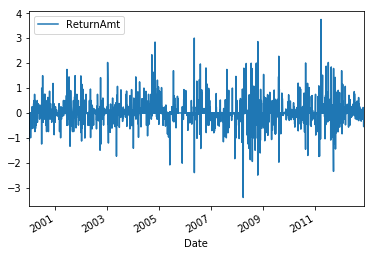

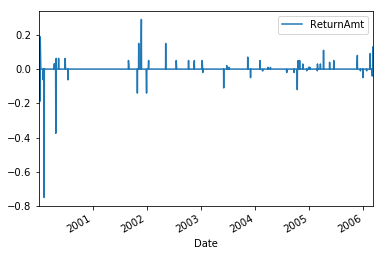

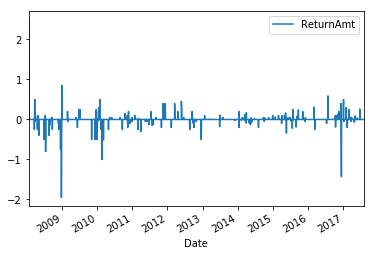

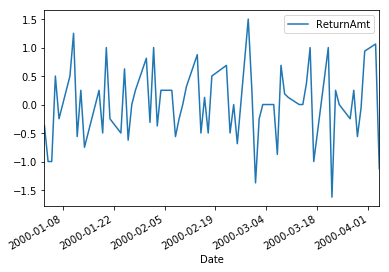

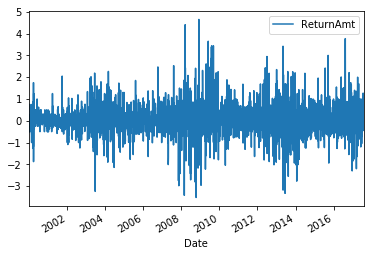

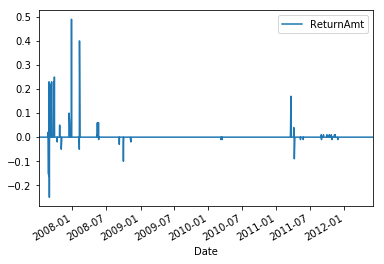

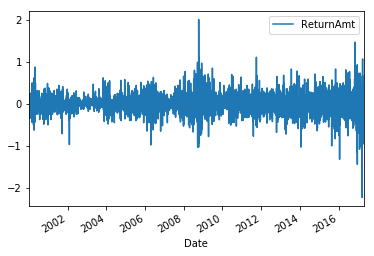

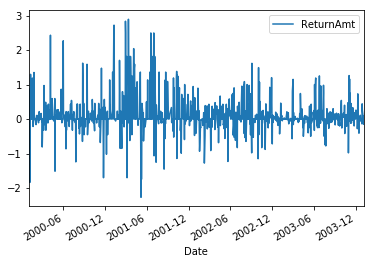

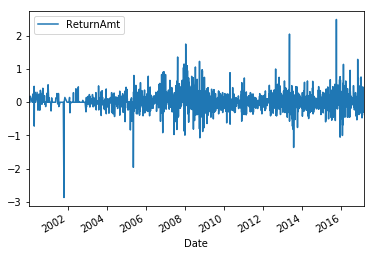

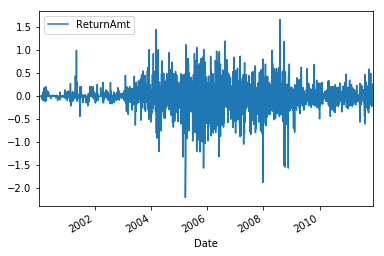

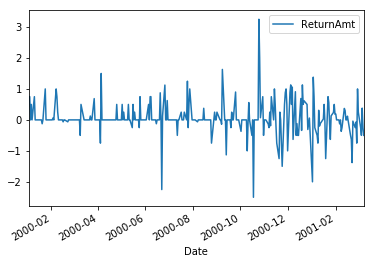

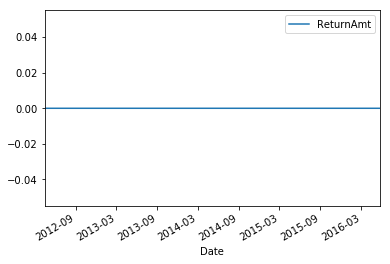

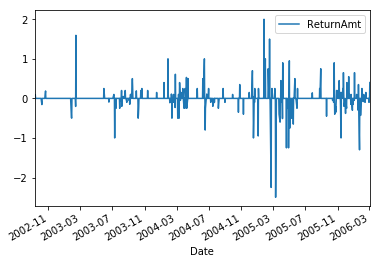

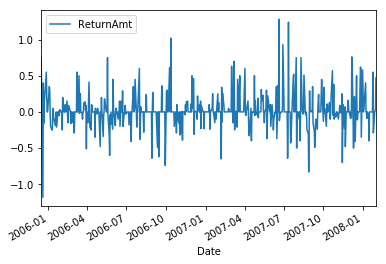

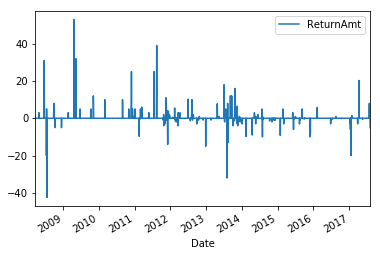

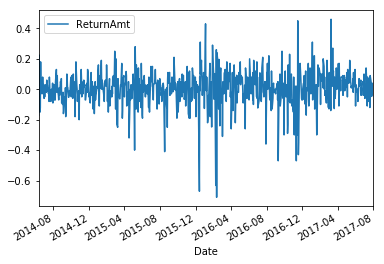

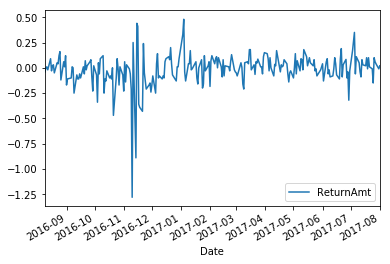

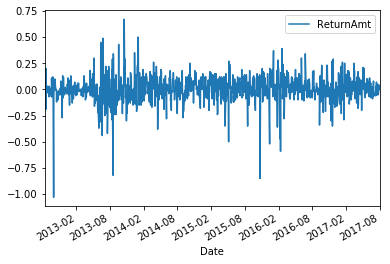

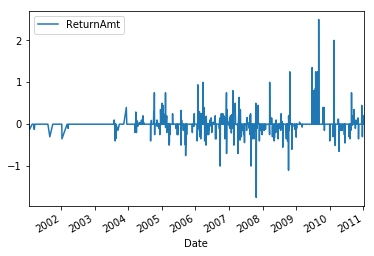

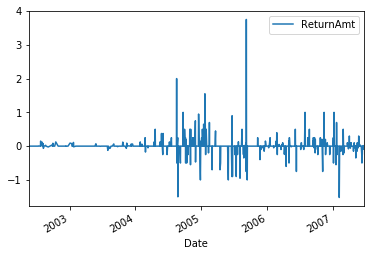

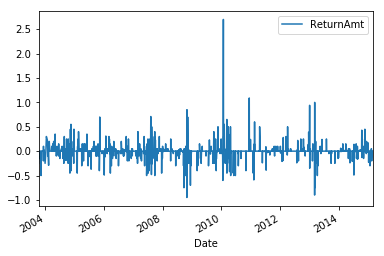

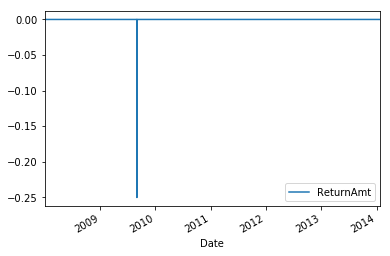

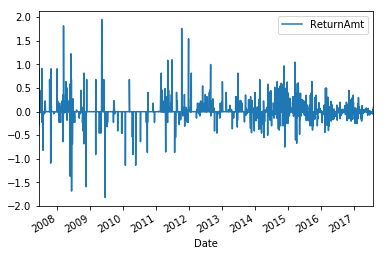

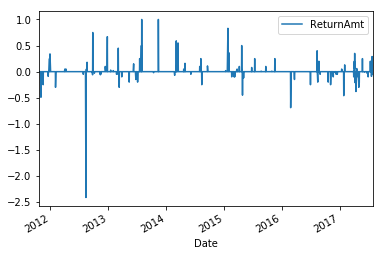

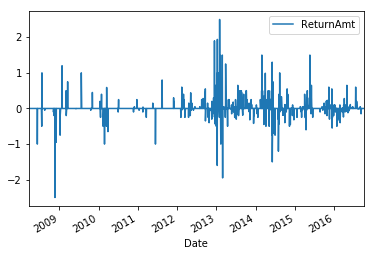

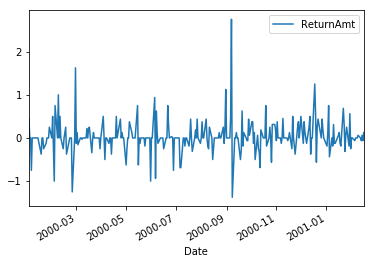

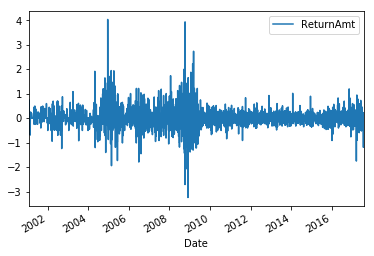

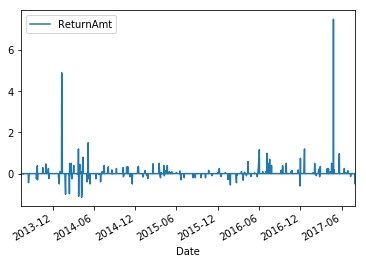

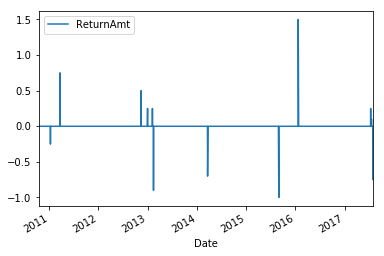

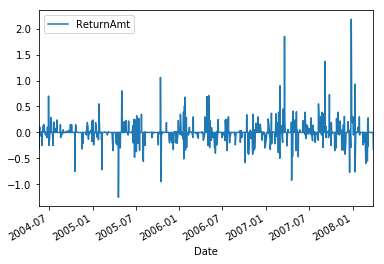

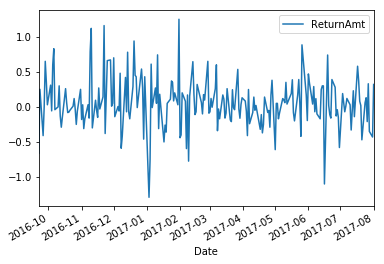

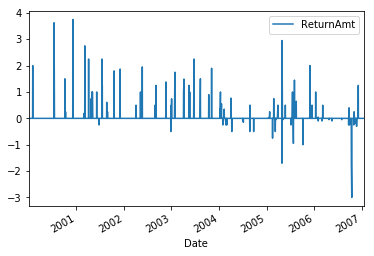

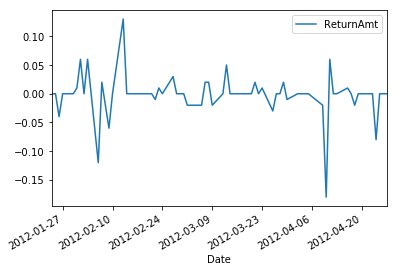

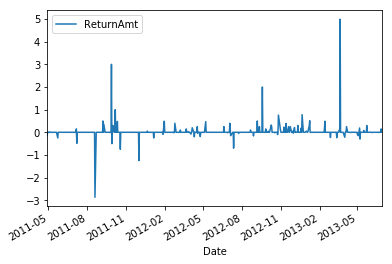

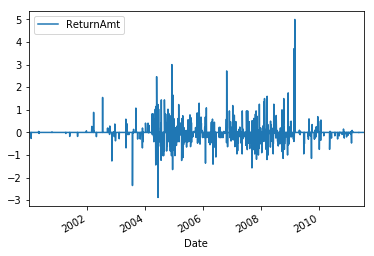

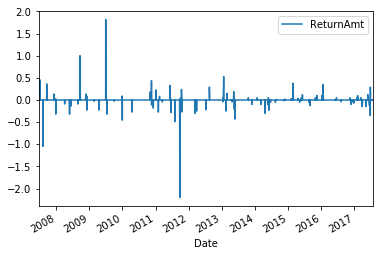

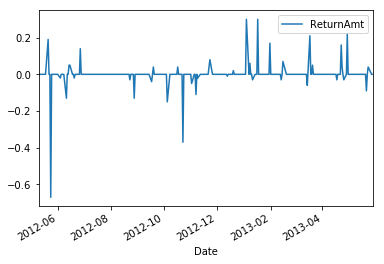

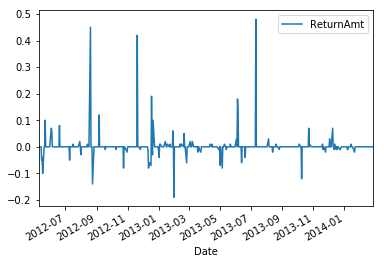

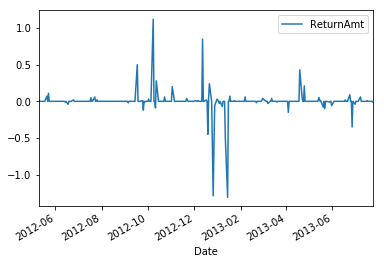

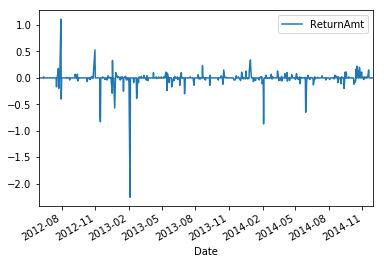

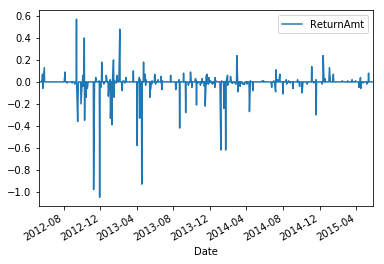

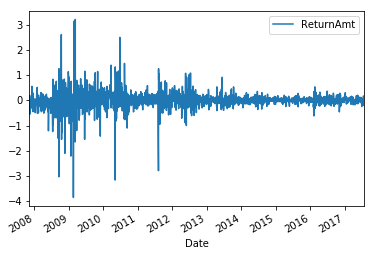

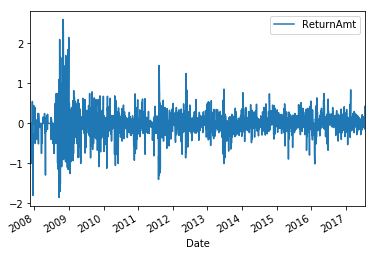

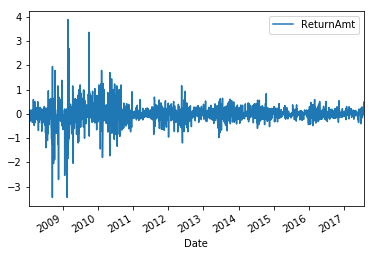

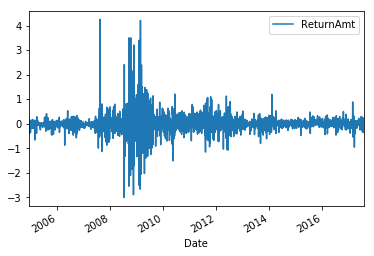

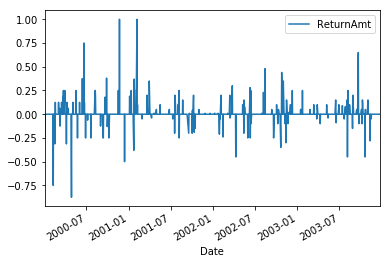

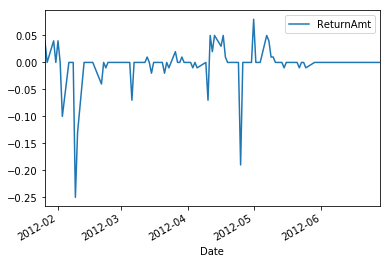

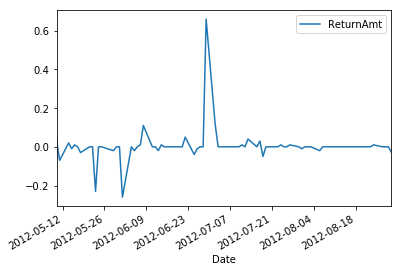

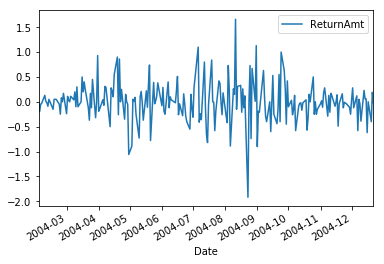

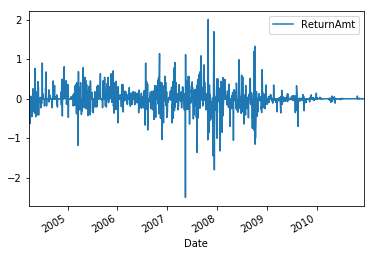

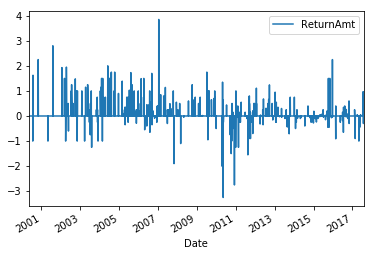

In [12]:
#### Uncomment line below to graph individual stock returns.
# sample.groupby("Ticker").plot(x = "Date", y = "ReturnAmt", legend = True, subplots = False)

# 4) More Calculating
Suppose you are interested in the historical data. Since these data are monthly,
calculate average monthly returns for banks from 1940-present. (Hint: use
closing prices at the end of each month). Plot the returns

In [13]:
# Make a dictionary of months and their associated end of month (eom) day
endOfMonth = {1:31, 2:28, 2:29, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}

def eom(date):
    """
    Input: A date object
    Output: True if the given date is the last day of the month, False otherwise
    """
    month = date.month
    day = date.day
    if endOfMonth[date.month] == day:
        return 1
    return 0

In [14]:
# Curate sample to datapoints after Jan 1, 1940 for end of month only

sample2 = df[ df.Date >= datetime.date(1940, 1, 1)]

# Determine which dates are EOM
sample2["EOM"] = list(map (lambda x: eom(x), sample2.Date))

# Only keep data from EOM
sample2 = sample2[sample2.EOM == 1]

# Calculate return amount and return pct
sample2["ReturnAmt"] = (sample2["Close"] - sample2["Open"])
sample2["ReturnPct"] = (sample2["Close"] - sample2["Open"]) / sample2["Close"]
sample2.head()

Date Ticker      Open      High       Low     Close     Volume  EOM  \
7   1994-05-31   ABCB  5.064261  5.292153  5.064261  5.292153  14.809663    1   
29  1994-06-30   ABCB  5.266831  5.469402  5.266831  5.266831   0.000000    1   
72  1994-08-31   ABCB  5.570687  5.570687  5.570687  5.570687   4.936554    1   
93  1994-09-30   ABCB  5.165546  5.469402  5.165546  5.165546   0.000000    1   
114 1994-10-31   ABCB  5.368117  5.570687  5.368117  5.570687  69.111762    1   

     ReturnAmt  ReturnPct  
7     0.227892   0.043062  
29    0.000000   0.000000  
72    0.000000   0.000000  
93    0.000000   0.000000  
114   0.202570   0.036364

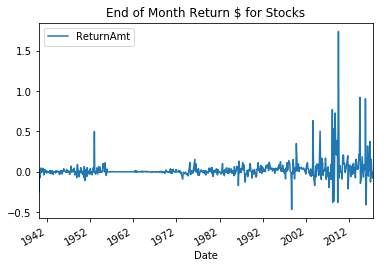

In [15]:
# Plot Return percentage for stocks on a given day over time
sample2.groupby(["Date"]).agg( {"ReturnAmt": np.mean}).plot(title = "End of Month Return $ for Stocks")

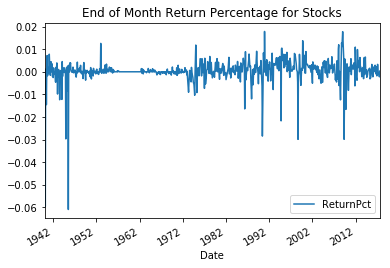

In [16]:
# Plot Return percentage for stocks on a given day over time
sample2.groupby(["Date"]).agg( {"ReturnPct": np.mean}).plot(title = "End of Month Return Percentage for Stocks")